In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import sys

sys.path.append("../")
from vuong_tests import *

In [3]:
#generate the sample
def gen_data():
    nobs = 1000
    beta1 = 5
    beta2 = 3
    alpha = 6
    x = np.random.uniform(low=0, high=1., size=nobs)
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)# np.random.uniform(low=-1., high=1., size=nobs) # 
    y = alpha + beta1 * x + beta2*x**2  + e
    y = .001 + y*(y>=.0001) # ensure that we don't get negative ys...
    return y,x,nobs

In [4]:
def compute_loglike(resid):
    sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
    ll = np.log(stats.norm.pdf(resid,loc=0,scale=sigma))
    return ll

In [5]:
def compute_llr(yn,xn):
    
    model1 = sm.OLS(np.log(yn),sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    ll1 = compute_loglike(np.exp(model1_fit.resid))
    
    model2 = sm.OLS(yn,sm.add_constant(xn))
    model2_fit = model2.fit(disp=False)
    ll2 = compute_loglike(model2_fit.resid)
    
    llr = ll1.sum() - ll2.sum()
    omega2 = (ll1- ll2).var()
    return llr,np.sqrt(omega2)

yn,xn,nobs = gen_data()
print(compute_llr(yn,xn))

(11.33035606637418, 0.701976106203012)


0
0


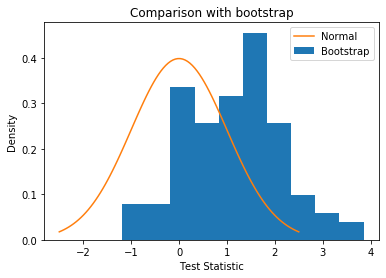

In [6]:
yn,xn,nobs = gen_data()
print(bootstrap_test(yn,xn,nobs,compute_llr,hist=True))
print(regular_test(yn,xn,nobs,compute_llr,hist=True))

plt.title("Comparison with bootstrap")
plt.xlabel("Test Statistic")
plt.ylabel("Density")
plt.legend()
plt.savefig('../figs/bootstrap_compare10')
plt.show()

In [7]:
reg,boot,llr, omega = monte_carlo(10,gen_data,compute_llr)
print("reg: %s, boot: %s, llr:%s, omega:%s"%(reg,boot,llr, omega))

reg: [0.9 0.1 0. ], boot: [0.8 0.2 0. ], llr:17.52079895672739, omega:0.7020632480217899


In [38]:
def setup_shi(yn,xn):
    model1 = sm.OLS(np.log(yn),sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    k1 = len(model1_fit.params)
    
    ll1 = compute_loglike(model1_fit.resid)
    scale1 = (np.exp(model1_fit.resid)**2).mean()
    
    tile_resid1 = np.tile( np.exp(model1_fit.resid), k1)
    tile_resid1 = np.reshape(tile_resid1, (k1,xn.shape[0]) ).transpose()
    grad1 = tile_resid1*sm.add_constant(xn)/scale1    
    hess1 = model1.hessian(model1_fit.params,scale=2*scale1)
    
    
    model2 = sm.OLS(yn,sm.add_constant(xn))
    model2_fit = model2.fit(disp=False)
    k2 = len(model1_fit.params)
    scale2 = (np.exp(model2_fit.resid)**2).mean()
    
    ll2 = compute_loglike(model2_fit.resid)
    
    tile_resid2 = np.tile( np.exp(model2_fit.resid), k2)
    tile_resid2 = np.reshape(tile_resid2, (k2,xn.shape[0]) ).transpose()
    grad2 = tile_resid2*sm.add_constant(xn)/scale2  
    #grad2 = model2.score(model2_fit.params)
    hess2 = model2.hessian(model2_fit.params)
    
    return ll1,grad1,hess1,ll2,k1, grad2,hess2,k2

yn,xn,nobs = gen_data()
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)

[1.04314726 0.49620169] [0.17874857 0.08502667]


In [9]:
sys.path.append("../")
from vuong_tests import *

shi_result = monte_carlo_shi(10,setup_shi,gen_data)
print(shi_result)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
#generate the sample, but this time i
def gen_data():
    nobs = 1000
    beta1 = 1
    beta2 = 1
    alpha = 1.5
    
    x = np.random.uniform(low=0, high=1., size=nobs)
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)# np.random.uniform(low=-1., high=1., size=nobs) # 
    y = alpha + beta1 * x + beta2*x**2  + e
    y = .001 + y*(y>=.0001) # ensure that we don't get negative ys...
    return y,x,nobs